### HW2: ML for materials science

In [158]:
import matplotlib.pyplot as plt

In [3]:
# download data
!mkdir data
!wget -O./data/train.dat https://raw.githubusercontent.com/dembart/intro-to-materials-informatics/refs/heads/main/data/hw2/train.dat

--2025-10-10 10:50:00--  https://raw.githubusercontent.com/dembart/intro-to-materials-informatics/refs/heads/main/data/hw2/train.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15144 (15K) [text/plain]
Saving to: ‘./data/train.dat’

./data/train.dat    100%[===================>]  14,79K  --.-KB/s    in 0,003s  

2025-10-10 10:50:01 (5,54 MB/s) - ‘./data/train.dat’ saved [15144/15144]



### Task 1: StandardScaler (5 points)

Write a function that scales the input feature matrix X using numpy. Compare your solution with scipy.stats.zscore method

In [523]:
import numpy as np
from scipy.stats import zscore

def CustomStandardScaler(X):
    
    """
    Performs Z-score normalization of the given matrix
    
    Params
    ------
    X: np.array
        matrix of shape (N, M) where each column
        corresponds to the feature vector

    Returns
    -------
    Scaled matrix

    """
    
    ### your code here ### 


X = np.random.randint(-30, 217,(100, 600))
CustomStandardScaler(X)

array([[-0.56115404, -0.19768492, -0.85234586, ...,  1.36323438,
         1.11808547,  1.14376127],
       [ 0.50303305,  1.34580095, -1.74433571, ...,  1.54150665,
        -0.39321217,  1.72284331],
       [-1.51619374, -1.63728232, -1.02224869, ...,  0.77356454,
        -1.21755634,  0.52013446],
       ...,
       [ 1.00783975, -0.13832008, -1.54611575, ...,  1.40437413,
        -0.79164518, -0.62318136],
       [ 0.10737375, -0.80617454,  1.38470806, ..., -0.44691488,
         1.53025756,  0.34195537],
       [ 1.06241345,  0.90056464, -1.09304153, ...,  1.44551389,
         1.18678082, -1.72195241]])

### Task 2: Coulomb matrix (5 points)

One of the ways of representing a molecular structure is a Coulomb matrix. Write a function that takes a molecule as an input and returns its Coulomb matrix (M) encoding

<img src=https://pubs.rsc.org/image/article/2018/sc/c7sc02664a/c7sc02664a-t3_hi-res.gif width=250>

$Z$ - atomic number

$R_i$ - position of an atom i


Compare your results with the dscribe pyhton package

https://singroup.github.io/dscribe/latest/tutorials/descriptors/coulomb_matrix.html



In [524]:
def coulomb_matrix(atoms):

    """
    This function calculates a Coulomb matrix for a given 
    molecular structure

    Params
    ------

    atoms: ase's Atoms object
        molecule

    Returns
    -------

    coulombic matrix of shape (N, N), where N is the number of atoms in the structure

    """
    matrix = None



    return matrix

### Task 3: Bootstrapping (5 points)

Demonstrate that for a dataset of $n$ samples, the expected proportion of unique instances in a bootstrap sample converges to $t = (1-1/e)$ for $n >> 1$

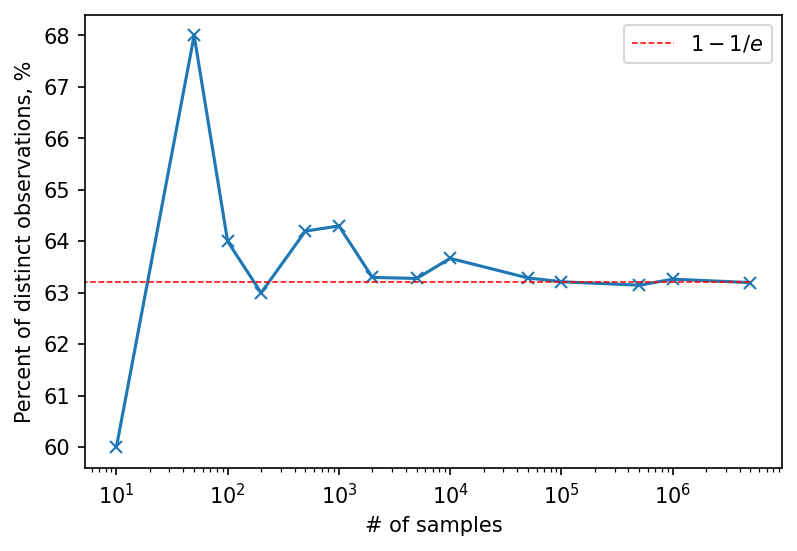

In [ ]:
# === your code ===

### Task 4: Hardness dataset

Given a hardness dataset (data/train.dat). The target property is stored in a 'property' column.

Features descirption is given in the original paper
https://arxiv.org/pdf/2304.12880


#### Part 1: (10 points)
- Perform EDA for the dataset

- Drop non-numerical columns

- Drop nearly collinear features ($R_p$ > 0.95) (done for you)

- Calculate a correlation matrix for the dataset 

- Plot barplot for $R_p$(feature_i, target)

- Report top5 features that have the highest correlation with the target property



- What are these features? Explain why they have a strong correlation






In [4]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('data/train.dat', sep = '\s+')


In [515]:
def remove_collinear_features(x, threshold):

    # source: https://www.kaggle.com/code/oldwine357/removing-highly-correlated-features/notebook
    """
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    """

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [516]:
# drop collinear features 

threshold = """you code here"""
X = remove_collinear_features(data.drop(['property', 'materials'], axis = 1), threshold)


Removed Columns {'Br', 'Gr', 'Y', 'BV', 'GV'}


#### Part 2: (20 points)

- Split your data set into train/test data splits with a ```test_size = 0.3```
- Fit at least 4 different regression models (e.g. SVR, KRR, RF, KNN regressor, AdaBoost) and report test metrics

- For two these models perform a grid search optimization of hyperparameters using KFold cross validation

- Perform feature importance study. What features are the most important?

- Perform forward feature selection. Plot MSE (or other metric) vs. # features

- How many features are enough? Can we get a better perfomance with less features?

In [518]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsRegressor
import numpy as np





Text(0, 0.5, 'Normalized count')

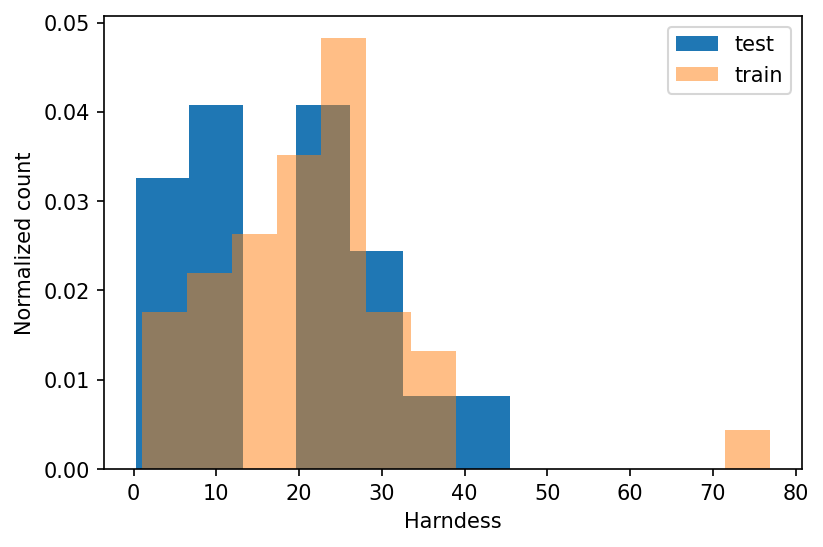

In [2]:
# Fit your favorite models on the train dataset and report metrics measured using test set

In [3]:
# Plot barplot Rp(feature_i, target property)

In [520]:
# Optimize hyperparameters using grid search with cross validation

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [300, 200, 100, 10, 1, 0.1, 0.01],
                         'gamma': ['scale', 'auto', 10.0, 1.0, 0.1, 0.01, 0.001,
                                   0.005, 0.0005]},
             verbose=1)

In [521]:
# get r2_score and MSE 

(0.7173728464477753, 4.488134584123709)

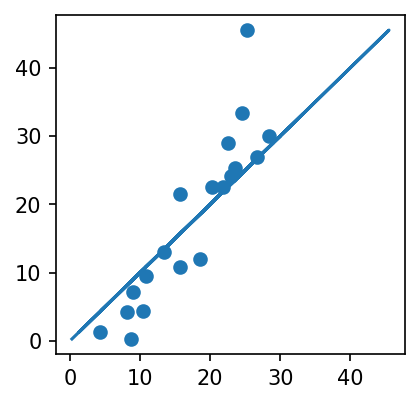

In [522]:
# plot y_test vs. predictions


In [497]:
# Perform forward feature selection
# You can use mlxtend library (or function from the seminar)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBacken

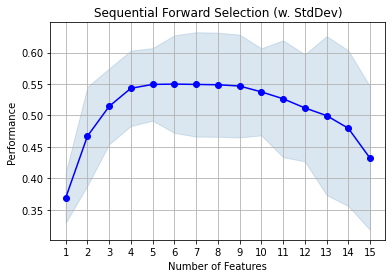

In [499]:
# plot MSE vs. # of features (you can use mlxtend library)

In [503]:
# refit model on the selected features

In [504]:
# report metrics for the refited model
r2_score(y_test, preds)

0.7846440238792973

(0.7846440238792973, 3.4985736741294473)

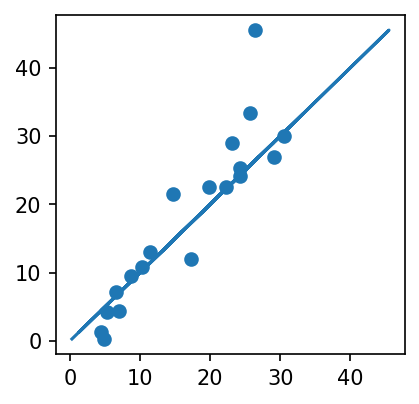

In [505]:
# plot y_test vs. predictions

In [1]:
# What are the features?

### Task 5: MLMD (20 points)


- Upload the crystal structure of Li10Ge(PS6)2 from the Materials project

- Perform molecular dynamics study of Li-ion conductivity in the structure. For this: 

    - Create a supercell with n_atoms >= 200

    - Perform NpT diffusion runs at T = 800, 1000, 1200 K
        - Using ASE

        - SevenNet universal interatomic potential (or any other)

    - Calculate the Li-ion mean squared displacements as a function of time for each run

    - Extract D vs. T data

    - Fit a line to log(D) vs. 1/T data

    - Report $D_0$ and $E_a$ of the fitted Arrhenius equation

    - Compare calculated values with the literatute




In [ ]:
# === your code ===

### Task 6: MLP Classifier (10 points)
- Train an MLPClassifier

- Plot the decision boundary for the trained model

- Achieve at least 95% accuracy on the test set

/Users/artemdembitskiy/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


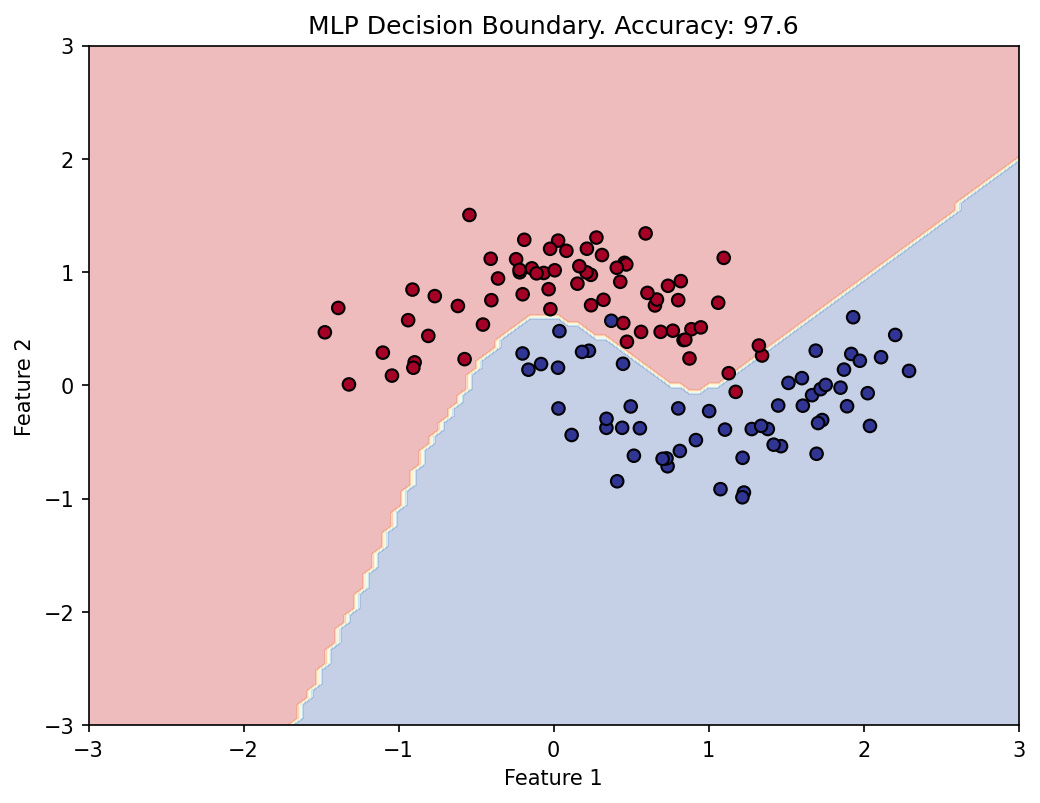

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# ===== your code =====